In [3]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut


In [4]:
df = pd.read_csv('./sum_cosines.csv', header=None)

x = df[0].to_numpy()
y1 = df[1].to_numpy()

N = len(x)

x = x.reshape(N,1)
y1 = y1.reshape(N,1)


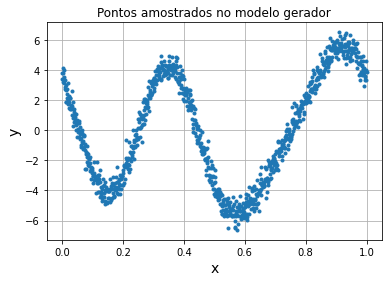

In [5]:
plt.plot(x, y1, '.')
plt.title('Pontos amostrados no modelo gerador')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()

plt.show()

###Holdout

In [6]:
mse_val = []
mse_train = []

split = 0.3

for i in range (1,21):

  # Split the whole set into random training and validation set.
  x_train, x_val, y_train, y_val = train_test_split(x, y1, test_size=split, shuffle=True, random_state=0)

  #print('Training set size:', len(y_train))
  #print('Validation set size:', len(y_val))

  # Instantiate a polynomial.
  poly = PolynomialFeatures(degree=i, include_bias=True)
  # Instantiate a scaler.
  scaler = StandardScaler()
  # Instantiate a linear regressor.
  reg = LinearRegression()

  # Create a pipeline of actions.
  poly_reg = Pipeline([
      ("poly", poly),
      ("scaler", scaler),
      ("reg", reg),
  ])

  poly_reg.fit(x_train, y_train)

  y_train_predict = poly_reg.predict(x_train)

  y_val_predict = poly_reg.predict(x_val)

  mse_val.append(mean_squared_error(y_val, y_val_predict))

  mse_train.append(mean_squared_error(y_train, y_train_predict))

###K-Fold

In [7]:
kfold_mean_vec = []
kfold_std_vec = []
idx = 0
k = 10
for i in range (1,21):
    
    kfold_mean_vec.append([])
    kfold_std_vec.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=k, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=i, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        # Calculate the cross-validation score with kfold object.
        # OBS.: All scorer objects follow the convention that higher return values are better than lower return values. 
        #       Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
        #       are available as neg_mean_squared_error which return the negated value of the metric.
        lin_scores = cross_val_score(poly_reg, x, y1, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mean_vec[idx].append(scores.mean())
        kfold_std_vec[idx].append(scores.std())
    idx += 1

###Leave-P-Out

In [8]:
lpo_mse = []
lpo_std = []

for i in range(1, 21):

    lpocv = LeavePOut(p=1)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=i, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    lin_scores = cross_val_score(poly_reg, x, y1, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = -lin_scores
    lpo_mse.append(scores.mean())
    lpo_std.append(scores.std())   

###Curva de MSE x Ordem do polinômio para o Holdout

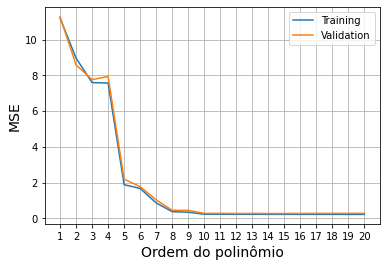

In [9]:
ordem = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] #Criado a lista assim, pois usando a função list estava dando alguns erros ao executar

plt.figure()
plt.plot(ordem, mse_train, label='Training')
plt.plot(ordem, mse_val, label='Validation')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.xticks(ordem)
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

###Curva de MSE x Ordem do polinômio para K-Fold\
###Curva de Desvio Padrão x Ordem do polinômio

k = 1: MSE mean: 11.2617 - MSE var: 0.0002
k = 2: MSE mean: 8.8760 - MSE var: 0.0002
k = 3: MSE mean: 7.6737 - MSE var: 0.0003
k = 4: MSE mean: 7.6953 - MSE var: 0.0004
k = 5: MSE mean: 1.9818 - MSE var: 0.0000
k = 6: MSE mean: 1.7290 - MSE var: 0.0001
k = 7: MSE mean: 0.9162 - MSE var: 0.0000
k = 8: MSE mean: 0.4039 - MSE var: 0.0000
k = 9: MSE mean: 0.3787 - MSE var: 0.0000
k = 10: MSE mean: 0.2485 - MSE var: 0.0000
k = 11: MSE mean: 0.2488 - MSE var: 0.0000
k = 12: MSE mean: 0.2433 - MSE var: 0.0000
k = 13: MSE mean: 0.2438 - MSE var: 0.0000
k = 14: MSE mean: 0.2423 - MSE var: 0.0000
k = 15: MSE mean: 0.2426 - MSE var: 0.0000
k = 16: MSE mean: 0.2431 - MSE var: 0.0000
k = 17: MSE mean: 0.2435 - MSE var: 0.0000
k = 18: MSE mean: 0.2438 - MSE var: 0.0000
k = 19: MSE mean: 0.2432 - MSE var: 0.0000
k = 20: MSE mean: 0.2437 - MSE var: 0.0000


k = 1: STD DEV mean: 0.9547 - STD DEV var:0.0527
k = 2: STD DEV mean: 0.9134 - STD DEV var:0.0486
k = 3: STD DEV mean: 0.6671 - STD DEV var:0.0283

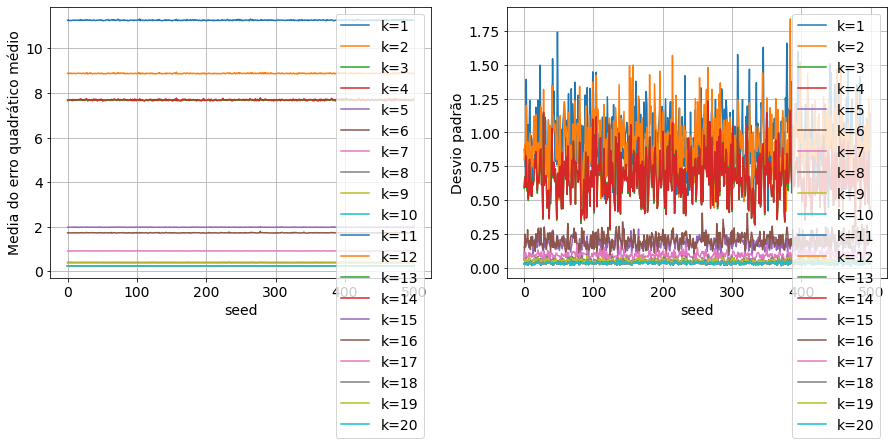

In [14]:
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
for k in range(0,len(ordem)):
    plt.plot(kfold_mean_vec[k], label='k='+str(ordem[k]))
    print('k = %d: MSE mean: %1.4f - MSE var: %1.4f' % (ordem[k], np.mean(kfold_mean_vec[k]), np.var(kfold_mean_vec[k])))
plt.ylabel('Media do erro quadrático médio', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print('\n')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(ordem)):
    plt.plot(kfold_std_vec[k], label='k='+str(ordem[k]))
    print('k = %d: STD DEV mean: %1.4f - STD DEV var:%1.4f' % (ordem[k], np.mean(kfold_std_vec[k]), np.var(kfold_std_vec[k])))
plt.ylabel('Desvio padrão', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

###Curva de MSE x Ordem do polinômio para Leave-P-Out\
###Curva de Desvio Padrão x Ordem do polinômio

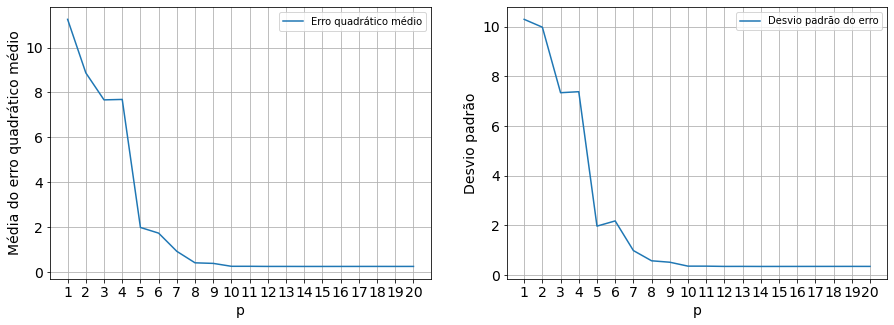

In [13]:
# Plot results.
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(ordem, lpo_mse, label='Erro quadrático médio')
plt.xlabel('p', fontsize=14)
plt.ylabel('Média do erro quadrático médio', fontsize=14)
plt.xticks(ordem)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
plt.plot(ordem, lpo_std, label='Desvio padrão do erro')
plt.xlabel('p', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(ordem)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Show the plot.
plt.show()

###Curvas de aprendizado

In [17]:
testSize = [0.3]
degrees = [1, 3, 5, 10, 20]
N = 1000

numOfSeeds = 10

mse_training = np.zeros((len(testSize), len(degrees), int(N*(1.0 - 0.1))+1 ))
mse_validation = np.zeros((len(testSize), len(degrees), int(N*(1.0 - 0.1))+1 ))

for t in range(0, len(testSize)):
    
    # Number of training samples.
    trainSize = int(N*(1.0 - testSize[t]))

    # Iterate over the degrees.
    for i in range(0, len(degrees)):
        
        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=degrees[i], include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])
        
        # Iterate over the size of the training set.
        for m in range(1, trainSize+1):                
                
            # Use several different seeds.
            for s in range(0, numOfSeeds):     

                # Split the whole set into random training and validation set.
                x_train, x_val, y_train, y_val = train_test_split(x, y1, test_size=testSize[t], random_state=s)

                # Perform polynomial regression.
                poly_reg.fit(x_train[:m], y_train[:m])

                # Use the trained model for prediction of the training set.
                y_train_predict = poly_reg.predict(x_train[:m])

                # Use the trained model for prediction of the validation set.
                y_val_predict = poly_reg.predict(x_val)       

                # Calculate SE for training set.
                mse_training[t][i][m-1] += mean_squared_error(y_train[:m], y_train_predict)

                # Calculate SE for validation set.
                mse_validation[t][i][m-1] += mean_squared_error(y_val, y_val_predict)
            
            mse_training[t][i][m-1] /= numOfSeeds
            mse_validation[t][i][m-1] /= numOfSeeds

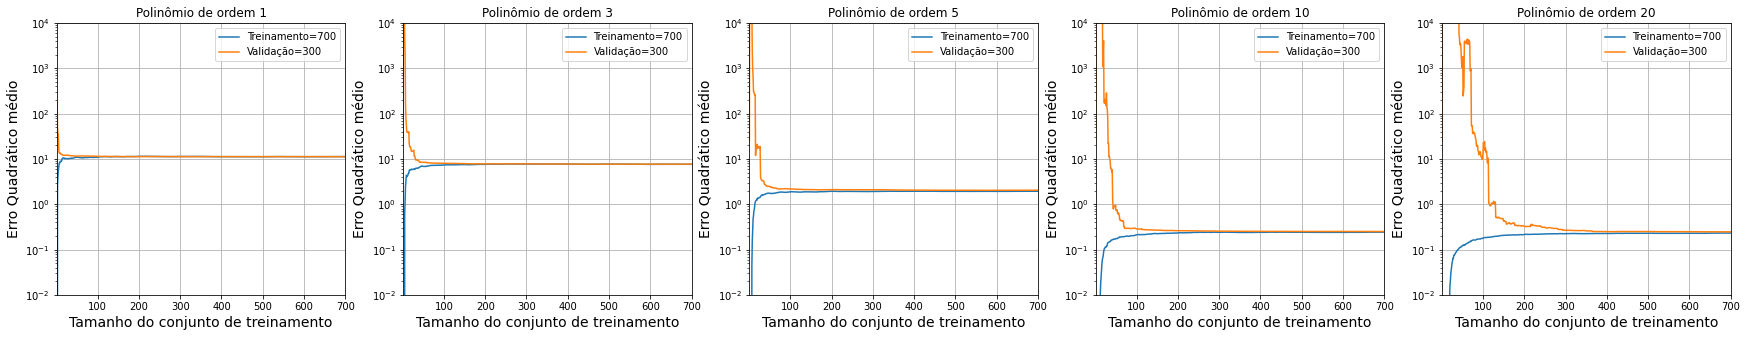

In [20]:
for t in range(0,len(testSize)):
    
    plt.figure(figsize=(30, 5))
    
    trainSize = int(N*(1.0 - testSize[t]))
    
    for i in range(0, len(degrees)):
        
        ax = plt.subplot(1, len(degrees), i + 1)
    
        plt.plot(range(1, trainSize+1), mse_training[t][i][0:trainSize], label='Treinamento='+str(trainSize))
        plt.plot(range(1, trainSize+1), mse_validation[t][i][0:trainSize], label='Validação='+str(N-trainSize))
        plt.yscale('log')
        plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
        plt.ylabel('Erro Quadrático médio', fontsize=14)
        plt.grid()
        plt.ylim([1e-2, 1e4])
        plt.xlim([1, trainSize])
        plt.title('Polinômio de ordem '+str(degrees[i]))
        plt.legend(loc='best')
    
    # Show the plot.
    plt.show()

###É possível verificar que conforme o conjunto de treinamento aumenta, a performance do modelo também melhora e os erros convergem para o MSE mínimo

###D)
###Com base nos gráficos obtidos anteriormente, a melhor ordem de polinômio seria 10, pois a partir dessa ordem o MSE se torna praticamente constante.

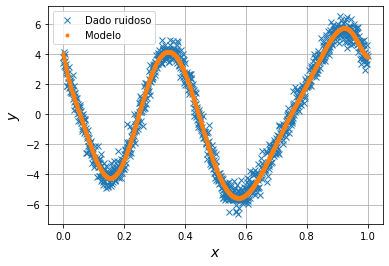

In [21]:
# Instantiate a polynomial.
poly = PolynomialFeatures(degree=10, include_bias=True)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a linear regressor.
reg = LinearRegression()

# Create a pipeline of actions.
poly_reg = Pipeline([
    ("poly", poly),
    ("scaler", scaler),
    ("reg", reg),
])

# Train the model with the ideal order.
poly_reg.fit(x, y1)

# Predict using the trained model.
y_pred = poly_reg.predict(x)

# Plot original data versus noisy version and predicted version.
plt.plot(x, y1, 'x', label='Dado ruidoso')

plt.plot(x, y_pred, '.', label='Modelo')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
# Show the plot.
plt.show()